In [1]:
%load_ext autoreload
%autoreload 2

from functions import *
from tqdm import *

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, ParameterGrid
from sklearn.metrics import mean_squared_error, make_scorer, balanced_accuracy_score
from sklearn.pipeline import make_pipeline

import pipeline_evaluation

import matplotlib.pyplot as plt

In [3]:
scorer = make_scorer(balanced_accuracy_score)

In [4]:
X_raw, meta_data_raw = pipeline_evaluation.get_data()

In [5]:
def altering_thresholds(percent_nonzero = 0.25, median_threshold = 5): 
    X_0, meta_data = pipeline_evaluation.preprocess(X_raw, meta_data_raw, percent_nonzero, median_threshold)
    X_1 = pd.concat([X_0,meta_data['vegetable_frequency']],axis=1)
    X_2 = remove_rows_where_column_nan(X_1,'vegetable_frequency')
    X_3 = remove_rows_where_column_specified(X_2,'vegetable_frequency','Unspecified','vegetable_frequency','other','vegetable_frequency','unknown')
    X = X_3.iloc[:,:-1]; y = X_3.iloc[:,-1]
    return X, y

In [99]:
def pipeline_rf(parameters):
    kf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    rf_scores = np.empty((5,1),float)
    columns = np.empty(1,float)
    for param_values in tqdm(list(ParameterGrid(parameters))):
        percent_nonzero = param_values['percent_nonzero']
        median_threshold = param_values['median_threshold']

        X, y = altering_thresholds(percent_nonzero, median_threshold)
        rf_model = make_pipeline(RandomForestClassifier(n_estimators=500))

        nested_score = cross_val_score(rf_model, X=X, y=y, cv=kf_outer, scoring=scorer, n_jobs=-1)

        rf_scores = np.append(rf_scores,np.reshape(nested_score,(5,1)),axis=1)
        columns = np.append(columns,X.shape[1])
    return rf_scores, columns

In [100]:
parameters_percent = {'percent_nonzero':np.linspace(0.3,1,21,False), 'median_threshold':[0]}
parameters_median = {'percent_nonzero':[0], 'median_threshold':np.linspace(2,200,20,True)}

In [101]:
percent_scores, percent_columns = pipeline_rf(parameters=parameters_percent)
median_scores, median_columns = pipeline_rf(parameters=parameters_median)

  0%|          | 0/21 [00:00<?, ?it/s]c:\Users\malth\OneDrive - University of Copenhagen\Bachelor\programs\pipeline_evaluation.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_4 = X_3 / np.sum(X_3, axis=1)[:, np.newaxis]
  5%|▍         | 1/21 [00:35<11:48, 35.43s/it]c:\Users\malth\OneDrive - University of Copenhagen\Bachelor\programs\pipeline_evaluation.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_4 = X_3 / np.sum(X_3, axis=1)[:, np.newaxis]
 10%|▉         | 2/21 [01:07<10:33, 33.35s/it]c:\Users\malth\OneDrive - University of Copenhagen\Bachelor\programs\pipeline_evaluation.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futur

In [102]:
percent_scores_tmp = percent_scores.T[1:,:]
percent_scores_std = percent_scores_tmp.std(axis=1)
percent_scores_mean = percent_scores_tmp.mean(axis=1)
percent_columns_tmp = percent_columns[1:].astype('int')
median_scores_tmp = median_scores.T[1:,:]
median_scores_std = median_scores_tmp.std(axis=1)
median_scores_mean = median_scores_tmp.mean(axis=1)
median_columns_tmp = median_columns[1:]
percent_columns_tmp = percent_columns[1:].astype('int')
percent_columns_1 = np.stack((np.linspace(0.3,1,21,False), percent_columns_tmp), axis=1)
median_columns_tmp = median_columns[1:]
median_columns_1 = np.stack((np.linspace(2,200,20,True).astype('int'), median_columns_tmp), axis=1)

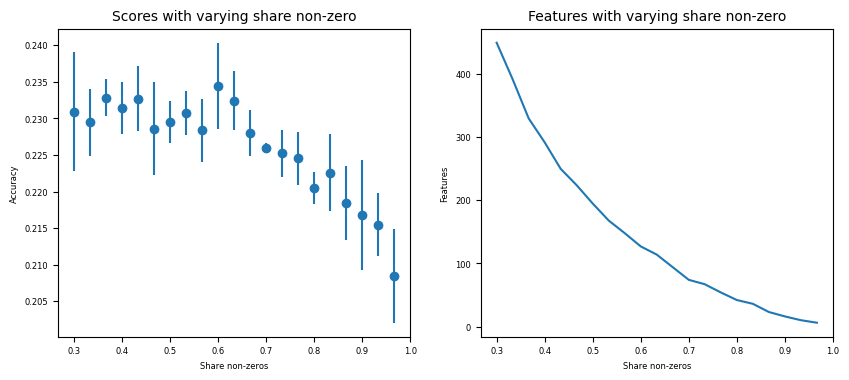

In [103]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].errorbar(np.linspace(0.3,1,21,False),percent_scores_mean,percent_scores_std, fmt='o') 
ax[1].plot(percent_columns_1[:,0],percent_columns_1[:,1]) 
ax[0].set_title('Scores with varying share non-zero')
ax[0].set_xlabel('Share non-zeros')
ax[0].set_ylabel('Accuracy')


ax[1].set_title('Features with varying share non-zero')
ax[1].set_xlabel('Share non-zeros')
ax[1].set_ylabel('Features')

plt.show()

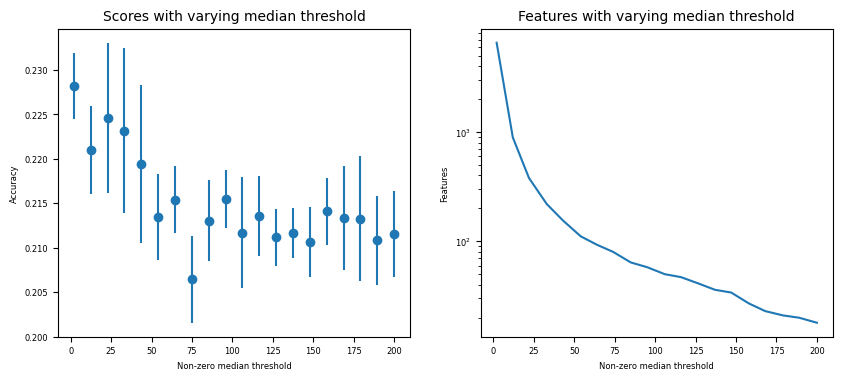

In [104]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].errorbar(np.linspace(2,200,20,True),median_scores_mean,median_scores_std, fmt='o')
ax[1].plot(median_columns_1[:,0],median_columns_1[:,1])

ax[0].set_title('Scores with varying median threshold')
ax[0].set_xlabel('Non-zero median threshold')
ax[0].set_ylabel('Accuracy')


ax[1].set_title('Features with varying median threshold')
ax[1].set_xlabel('Non-zero median threshold')
ax[1].set_ylabel('Features')
ax[1].set_yscale('log')

plt.show()

# Old

In [13]:
percent_scores_tmp = percent_scores[1:]
percent_columns_tmp = percent_columns[1:].astype('int')
median_scores_tmp = median_scores[1:]
median_columns_tmp = median_columns[1:]

In [ ]:
percent_scores_1 = np.stack((np.linspace(0.3,1,21,False), percent_scores_tmp), axis=1)
percent_columns_1 = np.stack((np.linspace(0.3,1,21,False), percent_columns_tmp), axis=1)
median_scores_1 = np.stack((np.linspace(2,200,20,True), median_scores_tmp), axis=1)
median_columns_1 = np.stack((np.linspace(2,200,20,True).astype('int'), median_columns_tmp), axis=1)

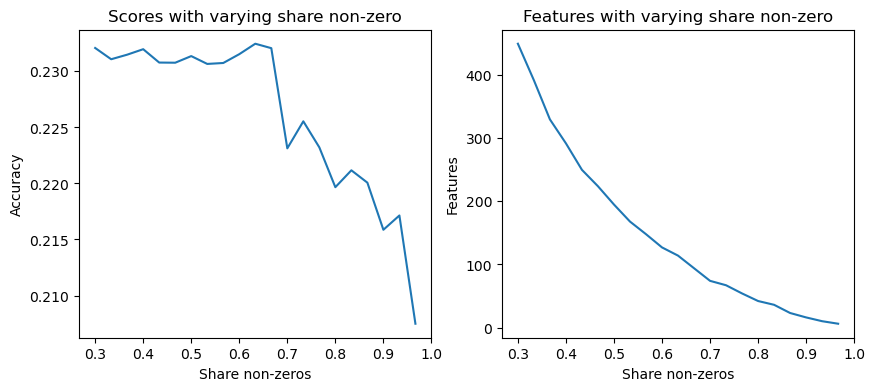

In [110]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].plot(percent_scores_1[:,0],percent_scores_1[:,1]) 
ax[1].plot(percent_columns_1[:,0],percent_columns_1[:,1]) 
ax[0].set_title('Scores with varying share non-zero')
ax[0].set_xlabel('Share non-zeros')
ax[0].set_ylabel('Accuracy')


ax[1].set_title('Features with varying share non-zero')
ax[1].set_xlabel('Share non-zeros')
ax[1].set_ylabel('Features')

plt.show()

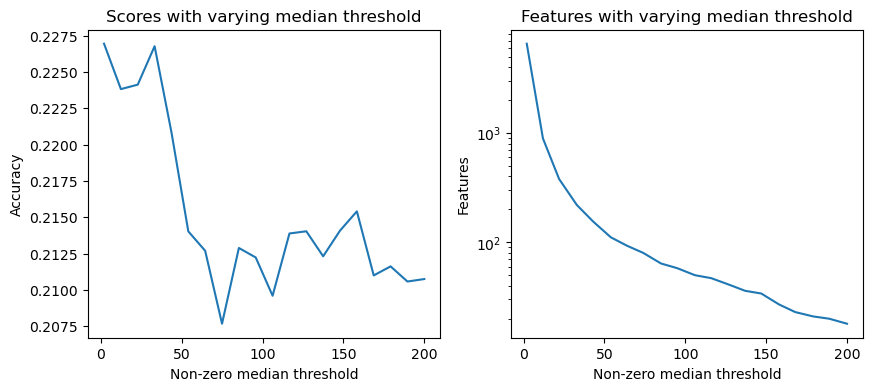

In [111]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))

ax[0].plot(median_scores_1[:,0],median_scores_1[:,1]) 
ax[1].plot(median_columns_1[:,0],median_columns_1[:,1])

ax[0].set_title('Scores with varying median threshold')
ax[0].set_xlabel('Non-zero median threshold')
ax[0].set_ylabel('Accuracy')


ax[1].set_title('Features with varying median threshold')
ax[1].set_xlabel('Non-zero median threshold')
ax[1].set_ylabel('Features')
ax[1].set_yscale('log')

plt.show()